In [1]:
import sys
import os
import numpy as np
from scipy.interpolate import interp1d
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['text.usetex'] = True

In [2]:
sys.path.append(r"C:\Users\d80084\Google Drive\01oxford\7 Thesis\code\quasigaussian")

In [17]:
from quassigaussian.fastcalibration.simulations import ProcessSimulator
from quassigaussian.volatility.local_volatility import LinearLocalVolatility
from quassigaussian.ploting.plot_approximations import ApproximatorPlotter
from quassigaussian.products.pricer import AnnuityPricer, BondPricer
from quassigaussian.products.instruments import Annuity, Swap

In [4]:
from qgtests.utis import get_mock_yield_curve

In [5]:
initial_curve = get_mock_yield_curve()

In [8]:
kappa = 0.001

time_grid = np.arange(0, 31)
y = np.ones(31)*0.1

lambda_t = interp1d(time_grid, y, kind='previous')
alpha_t = interp1d(time_grid, y, kind='previous')
b_t = interp1d(time_grid, y, kind='previous')

linear_local = LinearLocalVolatility(lambda_t, alpha_t, b_t)

In [13]:
number_samples = 1000
number_steps = 200

t_horizon = 30
dt = t_horizon/number_steps


In [22]:
swap_T0 = 1
swap_TN = 30
frequency = 0.5

In [26]:
bond_pricer = BondPricer(initial_curve, kappa)
annuity_pricer = AnnuityPricer(bond_pricer)
swap = Swap(swap_T0, swap_TN, frequency)
annuity = Annuity(swap.bond_list, frequency)

In [27]:
x_simulator = ProcessSimulator(number_samples, number_steps, dt, annuity_pricer)

In [7]:
res = x_simulator.simulate_xy(kappa=kappa, local_volatility=linear_local)

In [ ]:
res2 = x_simulator.simulate_xy(kappa=kappa, local_volatility=linear_local, annuity_measure=annuity)

C:\Users\d80084\Google Drive\01oxford\7 Thesis\code\quasigaussian\quassigaussian\products\pricer.py:17: RuntimeWarning: overflow encountered in double_scalars
  return self.initial_curve.get_discount(bond.maturity)/self.initial_curve.get_discount(t) * np.exp(-G*x - 0.5*math.pow(G, 2)*y)
C:\Users\d80084\Google Drive\01oxford\7 Thesis\code\quasigaussian\quassigaussian\fastcalibration\simulations.py:52: RuntimeWarning: invalid value encountered in double_scalars
  self.annuity_pricer.annuity_dx(t, x[i][j], y[i][j], kappa, annuity_measure) * eta
C:\Users\d80084\Google Drive\01oxford\7 Thesis\code\quasigaussian\quassigaussian\products\pricer.py:17: RuntimeWarning: overflow encountered in exp
  return self.initial_curve.get_discount(bond.maturity)/self.initial_curve.get_discount(t) * np.exp(-G*x - 0.5*math.pow(G, 2)*y)
C:\Users\d80084\Google Drive\01oxford\7 Thesis\code\quasigaussian\quassigaussian\products\pricer.py:107: RuntimeWarning: overflow encountered in double_scalars
  res += annuit

In [8]:
approximation_plotter = ApproximatorPlotter()

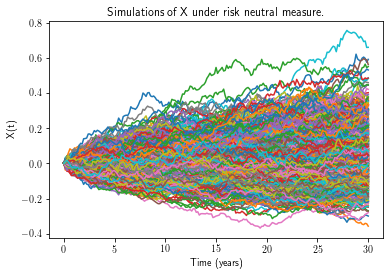

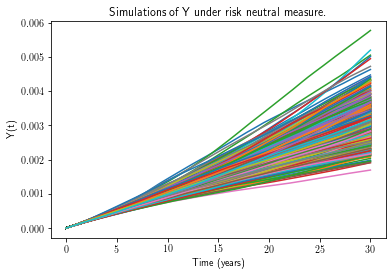

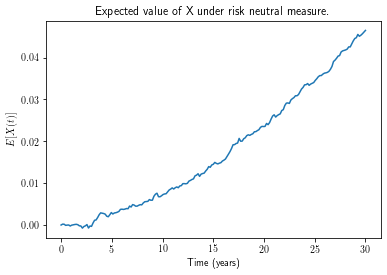

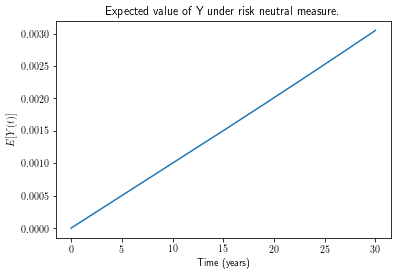

In [9]:
approximation_plotter.plot_xy_approximation(res)